In [1]:
import warnings
from argparse import ArgumentParser

import pandas as pd

from datasets import Priv_NAMES as DATASET_NAMES
from datasets import get_private_dataset
from models import get_all_models
from models import get_model
from utils.Server import train
from utils.Toolbox_analysis import create_latent_df, process_latent_df

warnings.simplefilter(action='ignore', category=FutureWarning)


def parse_args():
    parser = ArgumentParser(description='You Only Need Me', allow_abbrev=False)
    parser.add_argument('--device_id', type=int, default=0, help='The Device Id for Experiment')

    # Communication - epochs
    parser.add_argument('--communication_epoch', type=int, default=20,
                        help='The Communication Epoch in Federated Learning')
    parser.add_argument('--local_epoch', type=int, default=5, help='The Local Epoch for each Participant')

    # Participants info
    #TODO: LINK NUMBER OF PARTICIPANTS WITH SIMULATION
    parser.add_argument('--parti_num', type=int, default=None, help='The Number for Participants. If "None" will be setted as the sum of values described in --domain')
    parser.add_argument('--online_ratio', type=float, default=1, help='The Ratio for Online Clients')

    # Data parameters
    parser.add_argument('--dataset', type=str, default='fl_leaks', choices=DATASET_NAMES, help='Which scenario to perform experiments on.')
    parser.add_argument('--experiment_id', type=str, default='TEST_WINDOW_2', help='Which scenario the experiment is for.')
    parser.add_argument('--domains', type=dict, default={
                                                        'Graeme': 5,
                                                        # 'Balerma': 3,
                                                        },
                        help='Domains and respective number of participants.')

    ## Time series preprocessing
    parser.add_argument('--interval_agg', type=int, default=3 * 60 ** 2,
                        help='Agregation interval (seconds) of time series')
    parser.add_argument('--window_size', type=int, default=100, help='Rolling window length')

    # Model (AER) parameters
    parser.add_argument('--input_size', type=int, default=5, help='Number of sensors')  #TODO adaptar
    parser.add_argument('--output_size', type=int, default=5, help='Shape output - dense layer')
    parser.add_argument('--lstm_units', type=int, default=30,
                        help='Number of LSTM units (the latent space will have dimension 2 times bigger')

    # Federated parameters
    parser.add_argument('--model', type=str, default='fpl', help='Federated Model name.', choices=get_all_models()) #fedavg

    parser.add_argument('--structure', type=str, default='homogeneity')

    parser.add_argument('--pri_aug', type=str, default='weak',  # weak strong
                        help='Augmentation for Private Data')
    parser.add_argument('--learning_decay', type=bool, default=False, help='The Option for Learning Rate Decay')
    parser.add_argument('--averaging', type=str, default='weight', help='The Option for averaging strategy')

    parser.add_argument('--infoNCET', type=float, default=0.02, help='The InfoNCE temperature')
    parser.add_argument('--T', type=float, default=0.05, help='The Knowledge distillation temperature')
    parser.add_argument('--weight', type=int, default=1, help='The Weigth for the distillation loss')

    # torch.set_num_threads(4)
    # def add_management_args(parser: ArgumentParser) -> None:
    #     parser.add_argument('--csv_log', action='store_true',
    #                         help='Enable csv logging',default=False)
    #
    # add_management_args(parser)
    #
    args, unknown = parser.parse_known_args()

    if args.parti_num is None:
        args.parti_num = sum(args.domains.values())
    #
    # best = best_args[args.dataset][args.model]
    #
    # for key, value in best.items():
    #     setattr(args, key, value)
    #
    # if args.seed is not None:
    #     set_random_seed(args.seed)

    return args

In [3]:
args = parse_args()

results = {}

for scenario in ['Baseline', 'AutoScenario_1']:

    results[scenario] = {}

    priv_dataset = get_private_dataset(args)

    backbones_list = priv_dataset.get_backbone(parti_num=args.parti_num,
                                               names_list=None,
                                               n_series=args.input_size)

    model = get_model(backbones_list, args, priv_dataset)

    # priv_dataset.EXP_ID = ['Drift_PIPELINE_ALERNATIVE']
    # priv_dataset.DOMAINS_LIST = ['Balerma']

    priv_train_loaders, aux_latent = train(model=model,
                                           private_dataset=priv_dataset,
                                           scenario=scenario,
                                           args=args)

    results[scenario]['dl'] = priv_train_loaders
    results[scenario]['lat'] = aux_latent
    results[scenario]['model'] = model

Local Pariticipant 2 MSE = 0.236,InfoNCE = 0.000: 100%|██████████| 5/5 [00:04<00:00,  1.13it/s]


Partition 0: 1 clusters
Partition 0: 2 clusters
Partition 0: 2 clusters
Partition 0: 2 clusters
**--**--**--**--**--**--**--**--**--**--
SEM AGREGAÇÃO
Acc: 0.9042	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.9617	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.9318	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.9617	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.9318	Prec: 0.0000	Rec: 0.0000	F1: 0.0000


Local Pariticipant 3 MSE = 0.197,InfoNCE = 1.946: 100%|██████████| 5/5 [00:07<00:00,  1.52s/it]


Partition 0: 2 clusters
Partition 0: 2 clusters
Partition 0: 2 clusters
Partition 0: 2 clusters
**--**--**--**--**--**--**--**--**--**--
SEM AGREGAÇÃO
Acc: 0.7616	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.8984	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.9300	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.8976	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.8153	Prec: 0.0000	Rec: 0.0000	F1: 0.0000


Local Pariticipant 0 MSE = 0.109,InfoNCE = 2.104: 100%|██████████| 5/5 [00:07<00:00,  1.56s/it]


Partition 0: 2 clusters
Partition 0: 2 clusters
Partition 0: 2 clusters
Partition 0: 1 clusters
**--**--**--**--**--**--**--**--**--**--
SEM AGREGAÇÃO
Acc: 0.8691	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.9300	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.8605	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.8667	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.8601	Prec: 0.0000	Rec: 0.0000	F1: 0.0000


Local Pariticipant 1 MSE = 0.179,InfoNCE = 2.524: 100%|██████████| 5/5 [00:07<00:00,  1.42s/it]


Partition 0: 1 clusters
Partition 0: 1 clusters
Partition 0: 1 clusters
Partition 0: 1 clusters
**--**--**--**--**--**--**--**--**--**--
SEM AGREGAÇÃO
Acc: 0.7965	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.8959	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.7947	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.8461	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.8691	Prec: 0.0000	Rec: 0.0000	F1: 0.0000


Local Pariticipant 1 MSE = 0.179,InfoNCE = 2.102: 100%|██████████| 5/5 [00:07<00:00,  1.45s/it]


Partition 0: 1 clusters
Partition 0: 1 clusters
Partition 0: 1 clusters
Partition 0: 2 clusters
**--**--**--**--**--**--**--**--**--**--
SEM AGREGAÇÃO
Acc: 0.8147	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.8369	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.7560	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.8375	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.8599	Prec: 0.0000	Rec: 0.0000	F1: 0.0000


Local Pariticipant 1 MSE = 0.173,InfoNCE = 2.006: 100%|██████████| 5/5 [00:07<00:00,  1.42s/it]


Partition 0: 2 clusters
Partition 0: 2 clusters
Partition 0: 2 clusters
Partition 0: 2 clusters
**--**--**--**--**--**--**--**--**--**--
SEM AGREGAÇÃO
Acc: 0.7760	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.8623	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.7911	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.8617	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.8605	Prec: 0.0000	Rec: 0.0000	F1: 0.0000


Local Pariticipant 2 MSE = 0.145,InfoNCE = 2.007: 100%|██████████| 5/5 [00:07<00:00,  1.51s/it]


Partition 0: 2 clusters
Partition 0: 2 clusters
Partition 0: 2 clusters
Partition 0: 2 clusters
**--**--**--**--**--**--**--**--**--**--
SEM AGREGAÇÃO
Acc: 0.7996	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.8941	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.8282	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.8947	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.9318	Prec: 0.0000	Rec: 0.0000	F1: 0.0000


Local Pariticipant 0 MSE = 0.102,InfoNCE = 1.978: 100%|██████████| 5/5 [00:07<00:00,  1.49s/it]


Partition 0: 2 clusters
Partition 0: 2 clusters
Partition 0: 2 clusters
Partition 0: 2 clusters
**--**--**--**--**--**--**--**--**--**--
SEM AGREGAÇÃO
Acc: 0.8338	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.8024	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.7953	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.8375	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.8713	Prec: 0.0000	Rec: 0.0000	F1: 0.0000


Local Pariticipant 4 MSE = 0.097,InfoNCE = 2.246: 100%|██████████| 5/5 [00:07<00:00,  1.44s/it]


Partition 0: 2 clusters
Partition 0: 2 clusters
Partition 0: 2 clusters
Partition 0: 2 clusters
**--**--**--**--**--**--**--**--**--**--
SEM AGREGAÇÃO
Acc: 0.8387	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.8728	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.8064	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.8764	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.8387	Prec: 0.0000	Rec: 0.0000	F1: 0.0000


Local Pariticipant 4 MSE = 0.058,InfoNCE = 2.332: 100%|██████████| 5/5 [00:07<00:00,  1.44s/it]


Partition 0: 2 clusters
Partition 0: 2 clusters
Partition 0: 2 clusters
Partition 0: 2 clusters
**--**--**--**--**--**--**--**--**--**--
SEM AGREGAÇÃO
Acc: 0.8726	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.8393	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.7429	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.8588	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.8471	Prec: 0.0000	Rec: 0.0000	F1: 0.0000


Local Pariticipant 1 MSE = 0.031,InfoNCE = 1.791: 100%|██████████| 5/5 [00:08<00:00,  1.67s/it]


Partition 0: 2 clusters
Partition 0: 2 clusters
Partition 0: 2 clusters
Partition 0: 2 clusters
**--**--**--**--**--**--**--**--**--**--
SEM AGREGAÇÃO
Acc: 0.7990	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.8659	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.7764	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.8935	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.8830	Prec: 0.0000	Rec: 0.0000	F1: 0.0000


Local Pariticipant 4 MSE = 0.082,InfoNCE = 2.218: 100%|██████████| 5/5 [00:07<00:00,  1.50s/it]


Partition 0: 1 clusters
Partition 0: 1 clusters
Partition 0: 2 clusters
Partition 0: 1 clusters
**--**--**--**--**--**--**--**--**--**--
SEM AGREGAÇÃO
Acc: 0.7985	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.8445	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.7935	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.8445	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.8611	Prec: 0.0000	Rec: 0.0000	F1: 0.0000


Local Pariticipant 3 MSE = 0.017,InfoNCE = 3.906: 100%|██████████| 5/5 [00:06<00:00,  1.39s/it]


Partition 0: 2 clusters
Partition 0: 2 clusters
Partition 0: 2 clusters
Partition 0: 2 clusters
**--**--**--**--**--**--**--**--**--**--
SEM AGREGAÇÃO
Acc: 0.8782	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.8046	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.7352	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.8399	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.8488	Prec: 0.0000	Rec: 0.0000	F1: 0.0000


Local Pariticipant 3 MSE = 0.104,InfoNCE = 2.270: 100%|██████████| 5/5 [00:07<00:00,  1.44s/it]


Partition 0: 1 clusters
Partition 0: 1 clusters
Partition 0: 1 clusters
Partition 0: 1 clusters
**--**--**--**--**--**--**--**--**--**--
SEM AGREGAÇÃO
Acc: 0.8278	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.8304	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.8052	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.7838	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.8201	Prec: 0.0000	Rec: 0.0000	F1: 0.0000


Local Pariticipant 3 MSE = 0.090,InfoNCE = 1.951: 100%|██████████| 5/5 [00:07<00:00,  1.45s/it]


Partition 0: 2 clusters
Partition 0: 2 clusters
Partition 0: 2 clusters
Partition 0: 2 clusters
**--**--**--**--**--**--**--**--**--**--
SEM AGREGAÇÃO
Acc: 0.8976	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.8227	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.8824	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.8869	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.9002	Prec: 0.0000	Rec: 0.0000	F1: 0.0000


Local Pariticipant 2 MSE = 0.042,InfoNCE = 2.111: 100%|██████████| 5/5 [00:07<00:00,  1.50s/it]


Partition 0: 2 clusters
Partition 0: 2 clusters
Partition 0: 2 clusters
Partition 0: 2 clusters
**--**--**--**--**--**--**--**--**--**--
SEM AGREGAÇÃO
Acc: 0.8982	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.8605	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.8415	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.8707	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.9347	Prec: 0.0000	Rec: 0.0000	F1: 0.0000


Local Pariticipant 0 MSE = 0.038,InfoNCE = 2.277: 100%|██████████| 5/5 [00:07<00:00,  1.53s/it]


Partition 0: 2 clusters
Partition 0: 2 clusters
Partition 0: 2 clusters
Partition 0: 2 clusters
**--**--**--**--**--**--**--**--**--**--
SEM AGREGAÇÃO
Acc: 0.8441	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.7862	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.7711	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.8381	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.9347	Prec: 0.0000	Rec: 0.0000	F1: 0.0000


Local Pariticipant 1 MSE = 0.180,InfoNCE = 1.949: 100%|██████████| 5/5 [00:06<00:00,  1.24s/it]


Partition 0: 1 clusters
Partition 0: 1 clusters
Partition 0: 1 clusters
Partition 0: 1 clusters
**--**--**--**--**--**--**--**--**--**--
SEM AGREGAÇÃO
Acc: 0.8522	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.8098	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.8030	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.8701	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.8689	Prec: 0.0000	Rec: 0.0000	F1: 0.0000


Local Pariticipant 0 MSE = 0.114,InfoNCE = 1.822: 100%|██████████| 5/5 [00:05<00:00,  1.15s/it]


Partition 0: 1 clusters
Partition 0: 1 clusters
Partition 0: 2 clusters
Partition 0: 1 clusters
**--**--**--**--**--**--**--**--**--**--
SEM AGREGAÇÃO
Acc: 0.8361	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.8510	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.8121	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.8964	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.8441	Prec: 0.0000	Rec: 0.0000	F1: 0.0000


Local Pariticipant 1 MSE = 0.139,InfoNCE = 1.905: 100%|██████████| 5/5 [00:05<00:00,  1.15s/it]


Partition 0: 2 clusters
Partition 0: 2 clusters
Partition 0: 2 clusters
Partition 0: 2 clusters
**--**--**--**--**--**--**--**--**--**--
SEM AGREGAÇÃO
Acc: 0.8002	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.9318	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.8578	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.9300	Prec: 0.0000	Rec: 0.0000	F1: 0.0000
Acc: 0.8941	Prec: 0.0000	Rec: 0.0000	F1: 0.0000


Local Pariticipant 2 MSE = 0.167,InfoNCE = 0.000: 100%|██████████| 5/5 [00:03<00:00,  1.26it/s]


Partition 0: 1 clusters
Partition 0: 1 clusters
Partition 0: 1 clusters
Partition 0: 1 clusters
**--**--**--**--**--**--**--**--**--**--
SEM AGREGAÇÃO
Acc: 0.8231	Prec: 0.4599	Rec: 0.3916	F1: 0.4230
Acc: 0.7653	Prec: 0.3263	Rec: 0.3916	F1: 0.3560
Acc: 0.7971	Prec: 0.3716	Rec: 0.3257	F1: 0.3472
Acc: 0.7897	Prec: 0.3720	Rec: 0.3916	F1: 0.3816
Acc: 0.7905	Prec: 0.4398	Rec: 0.9665	F1: 0.6045


Local Pariticipant 1 MSE = 0.118,InfoNCE = 1.613: 100%|██████████| 5/5 [00:07<00:00,  1.52s/it]


Partition 0: 2 clusters
Partition 0: 2 clusters
Partition 0: 1 clusters
Partition 0: 1 clusters
**--**--**--**--**--**--**--**--**--**--
SEM AGREGAÇÃO
Acc: 0.8219	Prec: 0.4561	Rec: 0.3916	F1: 0.4214
Acc: 0.8002	Prec: 0.4518	Rec: 0.9665	F1: 0.6158
Acc: 0.7959	Prec: 0.3686	Rec: 0.3257	F1: 0.3458
Acc: 0.8026	Prec: 0.4500	Rec: 0.8623	F1: 0.5914
Acc: 0.7915	Prec: 0.4407	Rec: 0.9605	F1: 0.6041


Local Pariticipant 2 MSE = 0.130,InfoNCE = 2.878: 100%|██████████| 5/5 [00:07<00:00,  1.49s/it]


Partition 0: 1 clusters
Partition 0: 2 clusters
Partition 0: 1 clusters
Partition 0: 1 clusters
**--**--**--**--**--**--**--**--**--**--
SEM AGREGAÇÃO
Acc: 0.8121	Prec: 0.4557	Rec: 0.6898	F1: 0.5488
Acc: 0.7651	Prec: 0.4089	Rec: 0.9377	F1: 0.5695
Acc: 0.7544	Prec: 0.3946	Rec: 0.9030	F1: 0.5492
Acc: 0.7992	Prec: 0.4410	Rec: 0.7928	F1: 0.5668
Acc: 0.7838	Prec: 0.4300	Rec: 0.9377	F1: 0.5896


Local Pariticipant 3 MSE = 0.099,InfoNCE = 2.016: 100%|██████████| 5/5 [00:07<00:00,  1.52s/it]


Partition 0: 1 clusters
Partition 0: 1 clusters
Partition 0: 1 clusters
Partition 0: 1 clusters
**--**--**--**--**--**--**--**--**--**--
SEM AGREGAÇÃO
Acc: 0.7915	Prec: 0.4051	Rec: 0.5521	F1: 0.4673
Acc: 0.7951	Prec: 0.4439	Rec: 0.9377	F1: 0.6025
Acc: 0.8153	Prec: 0.4473	Rec: 0.4874	F1: 0.4665
Acc: 0.8121	Prec: 0.4664	Rec: 0.9305	F1: 0.6214
Acc: 0.7566	Prec: 0.3690	Rec: 0.6611	F1: 0.4736


Local Pariticipant 0 MSE = 0.096,InfoNCE = 1.705: 100%|██████████| 5/5 [00:07<00:00,  1.46s/it]


Partition 0: 2 clusters
Partition 0: 2 clusters
Partition 0: 2 clusters
Partition 0: 2 clusters
**--**--**--**--**--**--**--**--**--**--
SEM AGREGAÇÃO
Acc: 0.7199	Prec: 0.3135	Rec: 0.5808	F1: 0.4072
Acc: 0.7639	Prec: 0.4069	Rec: 0.9293	F1: 0.5660
Acc: 0.7104	Prec: 0.3048	Rec: 0.5844	F1: 0.4007
Acc: 0.7967	Prec: 0.4395	Rec: 0.8263	F1: 0.5738
Acc: 0.7667	Prec: 0.4059	Rec: 0.8802	F1: 0.5556


Local Pariticipant 0 MSE = 0.081,InfoNCE = 1.799: 100%|██████████| 5/5 [00:07<00:00,  1.43s/it]


Partition 0: 1 clusters
Partition 0: 2 clusters
Partition 0: 1 clusters
Partition 0: 2 clusters
**--**--**--**--**--**--**--**--**--**--
SEM AGREGAÇÃO
Acc: 0.7076	Prec: 0.2953	Rec: 0.5521	F1: 0.3848
Acc: 0.7945	Prec: 0.4441	Rec: 0.9557	F1: 0.6064
Acc: 0.7790	Prec: 0.4114	Rec: 0.7760	F1: 0.5378
Acc: 0.7955	Prec: 0.4377	Rec: 0.8251	F1: 0.5720
Acc: 0.7679	Prec: 0.4066	Rec: 0.8731	F1: 0.5548


Local Pariticipant 2 MSE = 0.105,InfoNCE = 2.208: 100%|██████████| 5/5 [00:06<00:00,  1.39s/it]


Partition 0: 2 clusters
Partition 0: 2 clusters
Partition 0: 2 clusters
Partition 0: 2 clusters
**--**--**--**--**--**--**--**--**--**--
SEM AGREGAÇÃO
Acc: 0.7901	Prec: 0.4094	Rec: 0.6036	F1: 0.4879
Acc: 0.7681	Prec: 0.4143	Rec: 0.9665	F1: 0.5799
Acc: 0.7655	Prec: 0.3855	Rec: 0.6994	F1: 0.4970
Acc: 0.7661	Prec: 0.4002	Rec: 0.8263	F1: 0.5393
Acc: 0.7727	Prec: 0.4121	Rec: 0.8731	F1: 0.5599


Local Pariticipant 1 MSE = 0.081,InfoNCE = 2.369: 100%|██████████| 5/5 [00:07<00:00,  1.51s/it]


Partition 0: 2 clusters
Partition 0: 2 clusters
Partition 0: 2 clusters
Partition 0: 2 clusters
**--**--**--**--**--**--**--**--**--**--
SEM AGREGAÇÃO
Acc: 0.6731	Prec: 0.1719	Rec: 0.2551	F1: 0.2054
Acc: 0.7606	Prec: 0.3837	Rec: 0.7353	F1: 0.5043
Acc: 0.6888	Prec: 0.3129	Rec: 0.7353	F1: 0.4390
Acc: 0.7272	Prec: 0.3423	Rec: 0.7018	F1: 0.4601
Acc: 0.7352	Prec: 0.3599	Rec: 0.7689	F1: 0.4903


Local Pariticipant 4 MSE = 0.038,InfoNCE = 1.987: 100%|██████████| 5/5 [00:07<00:00,  1.51s/it]


Partition 0: 2 clusters
Partition 0: 2 clusters
Partition 0: 2 clusters
Partition 0: 2 clusters
**--**--**--**--**--**--**--**--**--**--
SEM AGREGAÇÃO
Acc: 0.8171	Prec: 0.4650	Rec: 0.6922	F1: 0.5563
Acc: 0.7671	Prec: 0.3928	Rec: 0.7437	F1: 0.5141
Acc: 0.7869	Prec: 0.4287	Rec: 0.8611	F1: 0.5725
Acc: 0.8117	Prec: 0.4564	Rec: 0.7138	F1: 0.5567
Acc: 0.8066	Prec: 0.4508	Rec: 0.7689	F1: 0.5684


Local Pariticipant 2 MSE = 0.040,InfoNCE = 1.927: 100%|██████████| 5/5 [00:08<00:00,  1.63s/it]


Partition 0: 2 clusters
Partition 0: 2 clusters
Partition 0: 2 clusters
Partition 0: 2 clusters
**--**--**--**--**--**--**--**--**--**--
SEM AGREGAÇÃO
Acc: 0.7594	Prec: 0.3237	Rec: 0.4156	F1: 0.3639
Acc: 0.7647	Prec: 0.3898	Rec: 0.7437	F1: 0.5115
Acc: 0.8211	Prec: 0.4734	Rec: 0.7138	F1: 0.5692
Acc: 0.7455	Prec: 0.3775	Rec: 0.8263	F1: 0.5182
Acc: 0.8024	Prec: 0.4443	Rec: 0.7689	F1: 0.5632


Local Pariticipant 2 MSE = 0.022,InfoNCE = 2.221: 100%|██████████| 5/5 [00:06<00:00,  1.39s/it]


Partition 0: 2 clusters
Partition 0: 2 clusters
Partition 0: 2 clusters
Partition 0: 2 clusters
**--**--**--**--**--**--**--**--**--**--
SEM AGREGAÇÃO
Acc: 0.7124	Prec: 0.3098	Rec: 0.6000	F1: 0.4086
Acc: 0.7947	Prec: 0.4291	Rec: 0.7246	F1: 0.5390
Acc: 0.7752	Prec: 0.3722	Rec: 0.5198	F1: 0.4338
Acc: 0.8266	Prec: 0.4863	Rec: 0.8263	F1: 0.6122
Acc: 0.8084	Prec: 0.4535	Rec: 0.7653	F1: 0.5695


Local Pariticipant 4 MSE = 0.011,InfoNCE = 1.706: 100%|██████████| 5/5 [00:05<00:00,  1.20s/it]


Partition 0: 2 clusters
Partition 0: 2 clusters
Partition 0: 2 clusters
Partition 0: 2 clusters
**--**--**--**--**--**--**--**--**--**--
SEM AGREGAÇÃO
Acc: 0.6991	Prec: 0.2522	Rec: 0.4156	F1: 0.3139
Acc: 0.7929	Prec: 0.4280	Rec: 0.7437	F1: 0.5433
Acc: 0.7854	Prec: 0.3938	Rec: 0.5485	F1: 0.4585
Acc: 0.7560	Prec: 0.3794	Rec: 0.7437	F1: 0.5024
Acc: 0.8421	Prec: 0.5138	Rec: 0.8695	F1: 0.6459


Local Pariticipant 3 MSE = 0.022,InfoNCE = 1.917: 100%|██████████| 5/5 [00:06<00:00,  1.29s/it]


Partition 0: 2 clusters
Partition 0: 2 clusters
Partition 0: 2 clusters
Partition 0: 2 clusters
**--**--**--**--**--**--**--**--**--**--
SEM AGREGAÇÃO
Acc: 0.8016	Prec: 0.4040	Rec: 0.4156	F1: 0.4097
Acc: 0.7893	Prec: 0.4118	Rec: 0.6347	F1: 0.4995
Acc: 0.6870	Prec: 0.1376	Rec: 0.1689	F1: 0.1516
Acc: 0.8199	Prec: 0.4782	Rec: 0.9593	F1: 0.6382
Acc: 0.7981	Prec: 0.4285	Rec: 0.6563	F1: 0.5184


Local Pariticipant 0 MSE = 0.029,InfoNCE = 1.759: 100%|██████████| 5/5 [00:07<00:00,  1.48s/it]


Partition 0: 2 clusters
Partition 0: 2 clusters
Partition 0: 2 clusters
Partition 0: 2 clusters
**--**--**--**--**--**--**--**--**--**--
SEM AGREGAÇÃO
Acc: 0.6901	Prec: 0.2257	Rec: 0.3581	F1: 0.2769
Acc: 0.7623	Prec: 0.3868	Rec: 0.7425	F1: 0.5086
Acc: 0.7673	Prec: 0.3791	Rec: 0.6347	F1: 0.4747
Acc: 0.7959	Prec: 0.4307	Rec: 0.7222	F1: 0.5396
Acc: 0.8379	Prec: 0.5063	Rec: 0.8695	F1: 0.6399


Local Pariticipant 3 MSE = 0.011,InfoNCE = 2.454: 100%|██████████| 5/5 [00:06<00:00,  1.36s/it]


Partition 0: 2 clusters
Partition 0: 2 clusters
Partition 0: 2 clusters
Partition 0: 2 clusters
**--**--**--**--**--**--**--**--**--**--
SEM AGREGAÇÃO
Acc: 0.7620	Prec: 0.3645	Rec: 0.5880	F1: 0.4500
Acc: 0.7917	Prec: 0.4262	Rec: 0.7437	F1: 0.5419
Acc: 0.7752	Prec: 0.3925	Rec: 0.6515	F1: 0.4899
Acc: 0.7596	Prec: 0.3927	Rec: 0.8263	F1: 0.5324
Acc: 0.8361	Prec: 0.5031	Rec: 0.8695	F1: 0.6374


Local Pariticipant 2 MSE = 0.017,InfoNCE = 2.002: 100%|██████████| 5/5 [00:07<00:00,  1.41s/it]


Partition 0: 2 clusters
Partition 0: 2 clusters
Partition 0: 2 clusters
Partition 0: 2 clusters
**--**--**--**--**--**--**--**--**--**--
SEM AGREGAÇÃO
Acc: 0.7274	Prec: 0.3228	Rec: 0.5880	F1: 0.4168
Acc: 0.7911	Prec: 0.4253	Rec: 0.7437	F1: 0.5412
Acc: 0.8111	Prec: 0.4517	Rec: 0.6551	F1: 0.5347
Acc: 0.7459	Prec: 0.3679	Rec: 0.7437	F1: 0.4923
Acc: 0.8332	Prec: 0.4979	Rec: 0.8695	F1: 0.6332


Local Pariticipant 4 MSE = 0.006,InfoNCE = 1.861: 100%|██████████| 5/5 [00:07<00:00,  1.47s/it]


Partition 0: 2 clusters
Partition 0: 2 clusters
Partition 0: 2 clusters
Partition 0: 2 clusters
**--**--**--**--**--**--**--**--**--**--
SEM AGREGAÇÃO
Acc: 0.7429	Prec: 0.2764	Rec: 0.3413	F1: 0.3055
Acc: 0.7911	Prec: 0.4253	Rec: 0.7437	F1: 0.5412
Acc: 0.7387	Prec: 0.3281	Rec: 0.5509	F1: 0.4113
Acc: 0.7667	Prec: 0.4009	Rec: 0.8263	F1: 0.5399
Acc: 0.8355	Prec: 0.5021	Rec: 0.8695	F1: 0.6366


Local Pariticipant 4 MSE = 0.006,InfoNCE = 1.820: 100%|██████████| 5/5 [00:06<00:00,  1.34s/it]


Partition 0: 2 clusters
Partition 0: 2 clusters
Partition 0: 2 clusters
Partition 0: 2 clusters
**--**--**--**--**--**--**--**--**--**--
SEM AGREGAÇÃO
Acc: 0.6854	Prec: 0.1365	Rec: 0.1689	F1: 0.1510
Acc: 0.7403	Prec: 0.3619	Rec: 0.7437	F1: 0.4869
Acc: 0.8076	Prec: 0.4428	Rec: 0.6263	F1: 0.5188
Acc: 0.7673	Prec: 0.4016	Rec: 0.8263	F1: 0.5405
Acc: 0.7990	Prec: 0.4440	Rec: 0.8443	F1: 0.5819


Local Pariticipant 2 MSE = 0.015,InfoNCE = 1.882: 100%|██████████| 5/5 [00:09<00:00,  1.99s/it]


Partition 0: 2 clusters
Partition 0: 2 clusters
Partition 0: 2 clusters
Partition 0: 2 clusters
**--**--**--**--**--**--**--**--**--**--
SEM AGREGAÇÃO
Acc: 0.8270	Prec: 0.4818	Rec: 0.5880	F1: 0.5297
Acc: 0.7911	Prec: 0.4253	Rec: 0.7437	F1: 0.5412
Acc: 0.7746	Prec: 0.3921	Rec: 0.6551	F1: 0.4906
Acc: 0.7703	Prec: 0.4042	Rec: 0.8156	F1: 0.5405
Acc: 0.8332	Prec: 0.4979	Rec: 0.8695	F1: 0.6332


Local Pariticipant 3 MSE = 0.096,InfoNCE = 1.960: 100%|██████████| 5/5 [00:07<00:00,  1.53s/it]


Partition 0: 2 clusters
Partition 0: 2 clusters
Partition 0: 2 clusters
Partition 0: 2 clusters
**--**--**--**--**--**--**--**--**--**--
SEM AGREGAÇÃO
Acc: 0.7510	Prec: 0.2009	Rec: 0.1689	F1: 0.1835
Acc: 0.7935	Prec: 0.4289	Rec: 0.7437	F1: 0.5440
Acc: 0.7542	Prec: 0.3603	Rec: 0.6240	F1: 0.4568
Acc: 0.7183	Prec: 0.2738	Rec: 0.4240	F1: 0.3327
Acc: 0.7483	Prec: 0.3849	Rec: 0.8695	F1: 0.5336


In [13]:
import matplotlib.pyplot as plt
import torch

def extract_value(data_point, index):
    """Helper to extract float from tensor or float at a given index in a tuple."""
    value = data_point[index]
    if isinstance(value, torch.Tensor):
        return value.item()
    return float(value)

def plot_all_clients_side_by_side_proto(model, priv_train_loaders, metric='mse'):
    """
    Plot all clients' training history:
      - Left: all loss types (total_loss, mse, infonet)
      - Right: selected metric from metrics data
    """
    loss_labels = ['Total Loss', 'MSE', 'InfoNet']
    n_loss_types = len(loss_labels)
    loss_indices = range(n_loss_types)

    n_clients = len(model.nets_list)

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # --- Left Plot: All Losses ---
    for client_id in range(n_clients):
        fit_history = model.nets_list[client_id].fit_history

        if not fit_history:
            continue

        for idx in loss_indices:
            y_vals = [extract_value(record, idx) for record in fit_history]
            axes[0].plot(
                y_vals,
                label=f'Client {client_id} - {loss_labels[idx]}'
            )

    axes[0].set_title('Client Loss Components Over Epochs')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss')
    axes[0].grid(True)
    axes[0].legend()

    # --- Right Plot: Selected Metric ---
    metric_map = {
        'acc': 0,
        'prec': 1,
        'rec': 2,
        'f1': 3,
        'mse': 1,       # reuse index for common case
        'infonet': 2    # reuse index for convenience if needed
    }

    if metric not in metric_map:
        raise ValueError(f"Invalid metric '{metric}'. Choose from: {list(metric_map.keys())}")

    metric_idx = metric_map[metric]

    for client_id in range(n_clients):
        metrics = priv_train_loaders[client_id]['metrics']
        y_vals = [extract_value(record, metric_idx) for record in metrics]
        axes[1].plot(y_vals, label=f'Client {client_id}')

    axes[1].set_title(f'{metric.upper()} per Client')
    axes[1].set_xlabel('Round')
    axes[1].set_ylabel(metric.upper())
    axes[1].grid(True)
    axes[1].legend()

    plt.tight_layout()
    plt.show()


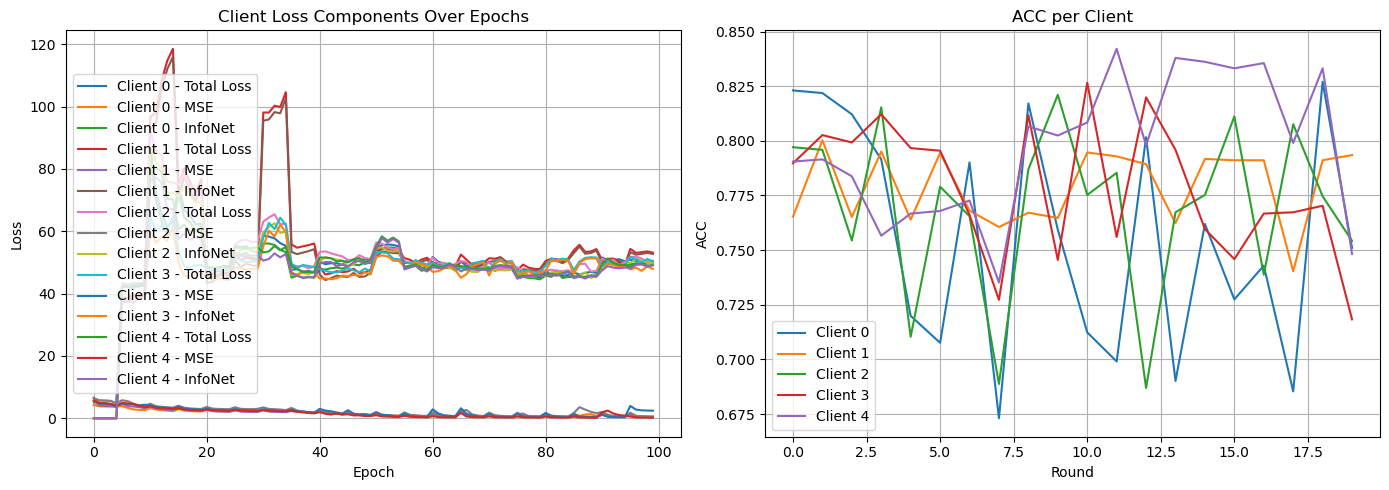

In [15]:
from utils.Toolbox_analysis import plot_all_clients_side_by_side

plot_all_clients_side_by_side_proto(model, priv_train_loaders, metric='acc')

In [17]:
# label_clients = ['District_A', 'District_B', 'District_C', 'District_D', 'District_E']
# label_clients = ['District_A', 'District_B', 'District_C']
label_clients = ['District_A', 'District_B', 'District_C', 'District_D', 'District_E',
                 'District_2A', 'District_2B', 'District_2C']

base_index = results['Baseline']['dl'][0]['X_index']

latent_dfs = {}
for scenario, case in results.items():
    latent_dfs[scenario] = {}
    for epoch, space in enumerate(case['lat']):
        aux_latents = []
        for i, client in enumerate(space):
            baseline_lat = create_latent_df(X_index=base_index,
                                            x_lat=client,
                                            label=scenario + '__' + label_clients[i] + '__' + str(epoch),
                                            is_unix=True)

            aux_latents.append(baseline_lat)

        df_latent = pd.concat(aux_latents)

        df_latent, df_pca_raw, df_umap_raw, df_pca_scaled, df_umap_scaled = process_latent_df(df_latent, umap_neighbors=50, umap_min_dist=0.95)

        latent_dfs[scenario][epoch] = {}
        latent_dfs[scenario][epoch]['latent_space'] = df_latent
        latent_dfs[scenario][epoch]['pca_raw'] = df_pca_raw
        latent_dfs[scenario][epoch]['pca_scl'] = df_pca_scaled
        latent_dfs[scenario][epoch]['umap_raw'] = df_umap_raw
        latent_dfs[scenario][epoch]['umap_scl'] = df_umap_scaled

In [18]:
import pickle

with open('results/exp_latente_results_graeme_3_100_proto.pkl', 'wb') as file:
    pickle.dump(results, file)

with open('results/exp_latente_df_graeme_3_100_proto.pkl', 'wb') as file:
    pickle.dump(latent_dfs, file)

In [ ]:
PARO

In [ ]:
# aux_latent[EPOCH][CLIENT]
aux_latent[0][0].shape

In [ ]:
def create_latent_df(X_index, x_lat, label='Teste', is_unix=False):
    """
    Create a DataFrame with timestamps, latent vector components, and anomaly labels.

    Parameters:
    - X_index: array of shape (n_samples,), can be UNIX timestamps or datetime
    - x_lat: array of shape (n_samples, n_latent_dims)
    - anomaly_df: DataFrame with 'start' and 'end' columns for anomaly intervals
    - is_unix: bool, if True converts X_index from UNIX timestamp to datetime

    Returns:
    - DataFrame with 'timestamp', 'label', and x_0 to x_n columns
    """
    # Step 1: Convert timestamps if needed
    if is_unix:
        timestamps = pd.to_datetime(X_index, unit='s')
    else:
        timestamps = pd.to_datetime(X_index)  # ensures consistent datetime dtype

    # Step 2: Create column names for latent dimensions
    latent_dim_names = [f'x_{i}' for i in range(x_lat.shape[1])]

    # Step 3: Create DataFrame
    df = pd.DataFrame(x_lat, columns=latent_dim_names)
    df['timestamp'] = timestamps
    df['label'] = label

    # Step 5: Reorder columns
    df = df[['timestamp', 'label'] + latent_dim_names]

    return df

In [ ]:
results['Drift_PIPELINE_LOW'] = {}

results['Drift_PIPELINE_LOW']['Baseline'] = (priv_train_loaders, aux_latent[-1], model)

In [ ]:
# >> PARA CADA SEGMENTO
## >>>> UTILIZAR MODELO DO SEGMENTO INICIAL PARA LEVAR TODOS NO MESMO ESPAÇO
import pandas as pd

nets_list_base = model.nets_list

latent_dfs = []
for j, (segment, case) in enumerate(results.items()):
    # label_clients = ['District_A', 'District_B', 'District_C', 'District_D', 'District_E']
    # label_clients = ['District_A', 'District_B', 'District_C']
    label_clients = ['District_A', 'District_B', 'District_C', 'District_D', 'District_E',
                     'District_2A', 'District_2B', 'District_2C']
    aux_latents = []

    for i, client in enumerate(label_clients):
        _, _, _, x_lat = nets_list_base[0].predict(case['Baseline'][0][i]['X'])

        baseline_lat = create_latent_df(X_index=case['Baseline'][0][i]['X_index'],
                                        x_lat=x_lat,
                                        label=segment + '_' + client,
                                        is_unix=True)

        aux_latents.append(baseline_lat)

    df_latent = pd.concat(aux_latents)
    df_latent['timestamp'] += pd.Timedelta(days=30 * j)
    latent_dfs.append(df_latent)

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from sklearn.decomposition import PCA
import umap.umap_ as umap


def reduce_dims(X, method = None, n_components=2, umap_neighbors=15, umap_min_dist=0.1):
    """
    Applies PCA and UMAP to the input data.

    Parameters:
    - X: array-like of shape (n_samples, n_features)
    - n_components: int, number of dimensions for the projection
    - umap_neighbors: int, UMAP neighbors
    - umap_min_dist: float, UMAP min_dist

    Returns:
    - X_pca: PCA-reduced data
    - X_umap: UMAP-reduced data
    """

    pca = PCA(n_components=n_components)

    X_pca = pca.fit_transform(X)
    if method == 'PCA':
        return X_pca, None

    reducer = umap.UMAP(n_components=n_components, n_neighbors=umap_neighbors, min_dist=umap_min_dist)
    X_umap = reducer.fit_transform(X)
    if method == 'UMAP':
        return None, X_umap

    return X_pca, X_umap


def plot_reduced_method(X_pca, X_umap, labels=None, method='PCA', ax=None, title=None):
    """
    Plots reduced data based on the selected method (PCA or UMAP).
    Accepts external axis (ax) for subplot usage.
    """
    if method not in ['PCA', 'UMAP']:
        raise ValueError("Invalid method! Use 'PCA' or 'UMAP'.")

    internal_fig = False
    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 5))
        internal_fig = True
    else:
        fig = ax.figure

    # Setup
    if labels is not None:
        labels = np.array(labels)
        unique_labels = np.unique(labels)
        colors = plt.cm.Set1(np.linspace(0, 1, len(unique_labels)))
        label_color_map = {label: color for label, color in zip(unique_labels, colors)}

        for label in unique_labels:
            idx = labels == label
            if method == 'PCA':
                ax.scatter(X_pca[idx, 0], X_pca[idx, 1], c=[label_color_map[label]], label=f"{label}", s=10)
            else:
                ax.scatter(X_umap[idx, 0], X_umap[idx, 1], c=[label_color_map[label]], label=f"{label}", s=10)

        legend_elements = [Patch(facecolor=label_color_map[label], label=f'{label}') for label in unique_labels]
        ax.legend(handles=legend_elements, bbox_to_anchor=(1, 1))
    else:
        proj = X_pca if method == 'PCA' else X_umap
        ax.scatter(proj[:, 0], proj[:, 1], s=10)

    ax.set_title(title if title else f"{method} Projection")
    ax.axis("off")

    if internal_fig:
        plt.tight_layout()
        plt.show()

In [ ]:
df_latent = pd.concat(latent_dfs)
df_latent['week'] = df_latent['timestamp'].dt.to_period('W').astype(str)
df_latent['hour'] = df_latent['timestamp'].dt.hour

# Dimensionality reduction
X_pca, X_umap = reduce_dims(
    X=df_latent.iloc[:, 2:-2],  # adjust index if needed
    method='UMAP',
    n_components=2,
    umap_neighbors=50,
    umap_min_dist=.75
)

In [ ]:
import ipywidgets as widgets
from IPython.display import clear_output

hour_options = sorted(df_latent['hour'].unique())

hour_selector = widgets.SelectMultiple(
    options=hour_options,
    value=[hour_options[0]],
    description='Hour(s):',
    # layout=widgets.Layout(width='50%')
)

# Create the dropdown and slider widgets
method_dropdown = widgets.Dropdown(
    options=['UMAP', 'PCA'],
    value='UMAP',
    description='Method:'
)

# Get available weeks from your timestamp column
available_weeks = sorted(df_latent['week'].unique())

week_slider = widgets.SelectionSlider(
    options=available_weeks,
    value=available_weeks[0],
    description='Week:',
    continuous_update=False,
    # layout=widgets.Layout(width='80%')
)


def update_plot(method, week, hours):
    clear_output(wait=True)

    # Filter by week and selected hours
    df_filtered = df_latent.reset_index(drop=True)
    df_filtered = df_filtered[(df_filtered['week'] == week) & (df_filtered['hour'].isin(hours))]

    print(df_filtered.shape)
    if df_filtered.empty:
        print("No data for selected filters.")
        return

    fig, ax = plt.subplots(figsize=(4, 3))  # Change width and height as desired

    # Plot
    plot_reduced_method(
        X_umap[df_filtered.index, :], X_umap[df_filtered.index, :],
        method=method,
        labels=df_filtered['label'],
        ax=ax
    )


widgets.interact(update_plot, method=method_dropdown, week=week_slider, hours=hour_selector)

In [ ]:
import pandas as pd

# Suppose X_umap and X_pca are available
# Add coordinates to df_latent
df_latent['umap_x'] = X_umap[:, 0]
df_latent['umap_y'] = X_umap[:, 1]


import altair as alt

# Create a selection for hour and week
hour_selection = alt.selection_multi(fields=['hour'], name="Select")
week_selection = alt.selection_single(fields=['week'], name="Week", bind='legend')

# Dropdown for method (UMAP/PCA)
method_dropdown = alt.selection_point(options=['UMAP'], name='Method: ')
method_selection = alt.selection_point(fields=['method'], bind=method_dropdown, name='Method')

# Prepare long-form data
df_umap = df_latent[['umap_x', 'umap_y', 'label', 'hour', 'week']].copy()
df_umap['method'] = 'UMAP'
df_umap = df_umap.rename(columns={'umap_x': 'x', 'umap_y': 'y'})


df_long = df_umap



In [ ]:
chart = alt.Chart(df_long).mark_circle(size=60).encode(
    x='x',
    y='y',
    color='label:N',
    tooltip=['label', 'hour', 'week'],
    opacity=alt.condition(hour_selection, alt.value(1), alt.value(0.05))
).add_selection(
    hour_selection,
    week_selection,
    method_selection
).transform_filter(
    hour_selection
).transform_filter(
    week_selection
).transform_filter(
    method_selection
).properties(
    width=500,
    height=400,
    title='Latent Space Visualization'
)

chart
